In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

In [29]:
df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
print("Dimensions initiales :", df.shape)
df.head()

Dimensions initiales : (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric = df_numeric.dropna()
print("Dimensions après nettoyage :", df_numeric.shape)

Dimensions après nettoyage : (1121, 38)


In [31]:
y = df_numeric["SalePrice"]
X = df_numeric.drop(columns=["SalePrice"])

In [32]:
from sklearn.model_selection import train_test_split

def pd4_stratified_split(X, y, test_size=0.2, random_state=42, bins=10):
    """
    Split data into train/test using stratification by binning the target variable.
    """
    y_bins = pd.cut(y, bins=bins, labels=False)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y_bins
    )
    return X_train, X_test, y_train, y_test

In [33]:
X_train, X_test, y_train, y_test = pd4_stratified_split(X, y)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (896, 37), Test shape: (225, 37)


In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [36]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train RMSE : {rmse_train:.2f}")
print(f"Test RMSE  : {rmse_test:.2f}")
print(f"Train R2   : {r2_train:.3f}")
print(f"Test R2    : {r2_test:.3f}")


Train RMSE : 37518.06
Test RMSE  : 31279.82
Train R2   : 0.797
Test R2    : 0.852


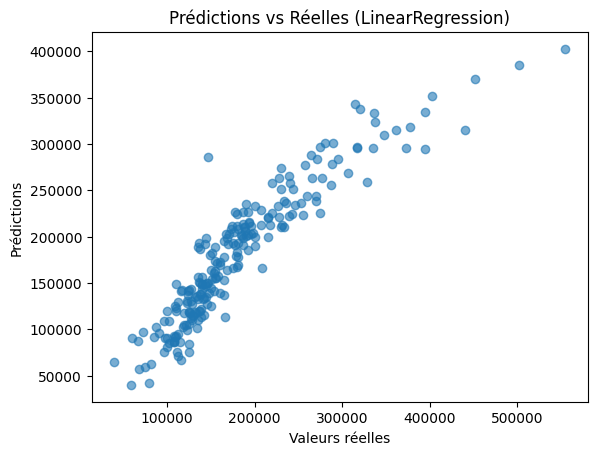

In [37]:
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Réelles (LinearRegression)")
plt.show()

In [38]:
joblib.dump(model, "model.pkl")
print("Modèle sauvegardé sous le nom 'model.pkl'")

Modèle sauvegardé sous le nom 'model.pkl'


In [39]:
import shutil

# Move the model to the output folder (Kaggle only allows downloads from /kaggle/working)
shutil.move("model.pkl", "/kaggle/working/model.pkl")


'/kaggle/working/model.pkl'